**Gender Gap in Spanish WP Data Set**

Grupo: <br>
Carlos Roberto Cordeiro Pereira <br>
João Felipe Morais Vasconcelos Sobral

Leitura do dataset:

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/jfmvs/AM-Projeto-1/main/data.csv')

# Business Understanding

## Business Objectives:
O objetivo do projeto é analisar a disparidade de gênero na Wikipédia em espanhol e identificar possíveis razões para a baixa participação de mulheres na plataforma. O objetivo final é perceber fatores que podem ajudar a abordar e reduzir a disparidade de gênero nesse site, incentivando mais mulheres a participar ativamente da criação e edição de conteúdo na plataforma.

## Assess Situation:
A análise inicial da situação indica que a participação de mulheres na Wikipédia em espanhol é significativamente menor do que a de homens. Isso é evidenciado pelo baixo número de edições e artigos criados por mulheres em comparação com homens. Essa disparidade de gênero pode ser um reflexo da desigualdade de gênero mais ampla em nossa sociedade, mas também pode ser influenciada por fatores específicos da plataforma, como a cultura e os processos de edição.

## Data Science Goals:
1. Preparar o conjunto de dados para análise.
2. Realizar a análise exploratória para identificar padrões e tendências na participação dos dois gêneros.
3. Analisar o tamanho da disparidade entre os dois gêneros na Wikipédia.
4. Ver quais características estão mais relacionadas.
5. Testar vários modelos e buscar seus melhores parâmetros para que seja feita a avaliação com o conjunto de testes.
6. Criar modelos otimizados que possam prever com base no histórico de edições do usuário se ele é homem ou mulher com uma boa precisão.

## *Project* Plan:
1. Análise dos dados: Coletar e visualizar os dados do conjunto de dados "Gender Gap in Spanish WP Dataset" para que possamos encontrar correlações, distribuições e características importantes.
2. Pré-processamento: Após a possível modificação das features do dataset na parte de análise e maior conhecimento sobre ele podemos então preparar os dados para a modelagem.
3. Criação de modelos: Com o dataset pronto para uso podemos então começar a criação dos modelos de machine learning e procurar pelos melhores hiperparâmetros em cada um.
4. Avaliação dos modelos: Após a obtenção dos melhores parâmetros e criação avaliamos então os resultados utilizando o conjunto de testes para validação.


# Análise exploratória


O dataset usado contém dados sobre a atividade de editores da wikipédia em espanhol com a finalidade de estimar quantos dos editores são mulheres. Os dados foram fornecidos numa tabela com 4.746 entradas e 21 atributos. Os atributos são:


|Atributo | Descrição |
| ---------------|----------------|
|gender |0 (unknown), 1 (male), 2 (female)|
C_api |gender extracted from WikiMedia API, codes as female / male / unknown
C_man |gender extracted from content coding, coded as 1 (male) / 2 (female) / 3 (unknown)
E_NEds |I index of stratum IJ (0,1,2,3)
E_Bpag |J index of stratum IJ (0,1,2,3)
firstDay | first edition in the Spanish Wikipedia (YYYYMMDDHHMMSS)
lastDay | last edition in the Spanish Wikipedia (YYYYMMDDHHMMSS)
NEds | total number of editions
NDays | number of days (lastDay-firstDay+1)
NActDays | number of days with editions
NPages | number of different pages edited
NPcreated | number of pages created
pagesWomen | number of edits in pages related to women
wikiprojWomen | number of edits in WikiProjects related to women
ns_user | number of edits in namespace user
ns_wikipedia | number of edits in namespace wikipedia
ns_talk | number of edits in namespace talk
ns_userTalk | number of edits in namespace user talk
ns_content | number of edits in content pages
weightIJ | correcting weight for stratum IJ
NIJ | number of elements in stratum IJ



Onde gender é o atributo de classificação de gênero do usuário, podendo ser masculino, feminino ou desconhecido. Os dados não tinham ocorrências de valores nulos ou duplicados. E se apresentavam da seguinte forma:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         4746 non-null   int64  
 1   C_api          4746 non-null   object 
 2   C_man          4746 non-null   int64  
 3   E_NEds         4746 non-null   int64  
 4   E_Bpag         4746 non-null   int64  
 5   firstDay       4746 non-null   int64  
 6   lastDay        4746 non-null   int64  
 7   NEds           4746 non-null   int64  
 8   NDays          4746 non-null   int64  
 9   NActDays       4746 non-null   int64  
 10  NPages         4746 non-null   int64  
 11  NPcreated      4746 non-null   int64  
 12  pagesWomen     4746 non-null   int64  
 13  wikiprojWomen  4746 non-null   int64  
 14  ns_user        4746 non-null   int64  
 15  ns_wikipedia   4746 non-null   int64  
 16  ns_talk        4746 non-null   int64  
 17  ns_userTalk    4746 non-null   int64  
 18  ns_conte

Fizemos algumas transformações para obter valores mais significativos. Os valores de data lastDay e firstDay se apresentavam com um único valor inteiro contendo o valor de data e hora no formato YYYYMMDDHHMMSS. Como esses dados representam quando o usuário fez sua primeira e última edição na wikipédia em espanhol, para cada uma dessas colunas geramos 3 colunas com o valor de ano, mês e dia como valores inteiros.
Outra transformação feita foi a dos valores de gender, que estavam como inteiros 0, 1 e 2 para valores categóricos de unknown, male e female. Os valores de C_api, C_man, E_NEds e E_Bpab que também representam categorias, foram transformados em valores categóricos.

In [ ]:
df['gender'] = df['gender'].replace({0: 'unknown', 1: 'male', 2: 'female'})

df['C_api'] =   df['C_api'].astype(str)

df['firstDay'] = df['firstDay'].astype(str)
df.insert(5, 'firstMonth',df['firstDay'].str.slice(4, 6).astype(int))
df.insert(5, 'firstYear', df['firstDay'].str.slice(0, 4).astype(int))
df['firstDay'] = df['firstDay'].str.slice(6, 8).astype(int)

df['lastDay'] =   df['lastDay'].astype(str)
df.insert(8,'lastMonth',  df['lastDay'].str.slice(4, 6).astype(int))
df.insert(8,'lastYear',  df['lastDay'].str.slice(0, 4).astype(int))
df['lastDay'] =   df['lastDay'].str.slice(6, 8).astype(int)

df['gender'] = df['gender'].astype('category')
df['C_api'] =   df['C_api'].astype('category')
df['C_man'] = df['C_man'].astype('category')
df['E_NEds'] =   df['E_NEds'].astype('category')
df['E_Bpag'] = df['E_Bpag'].astype('category')


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   gender         4746 non-null   category
 1   C_api          4746 non-null   category
 2   C_man          4746 non-null   category
 3   E_NEds         4746 non-null   category
 4   E_Bpag         4746 non-null   category
 5   firstYear      4746 non-null   int64   
 6   firstMonth     4746 non-null   int64   
 7   firstDay       4746 non-null   int64   
 8   lastYear       4746 non-null   int64   
 9   lastMonth      4746 non-null   int64   
 10  lastDay        4746 non-null   int64   
 11  NEds           4746 non-null   int64   
 12  NDays          4746 non-null   int64   
 13  NActDays       4746 non-null   int64   
 14  NPages         4746 non-null   int64   
 15  NPcreated      4746 non-null   int64   
 16  pagesWomen     4746 non-null   int64   
 17  wikiprojWomen  4746 non-null   in

Plotamos os gráficos a seguir para analisar a representatividade de cada categoria nos dados:


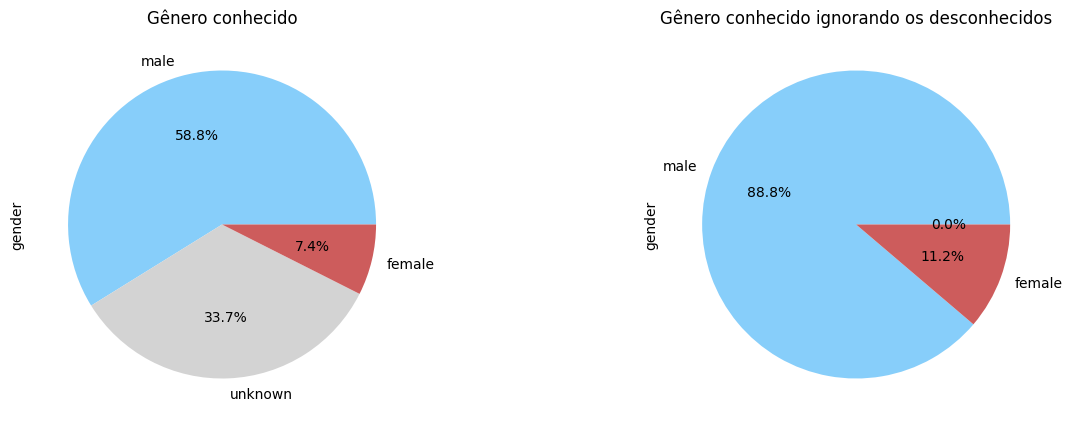

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# count values in gender column
gender_counts = df['gender'].value_counts()

df_ok = df[df['gender'] != 'unknown']
gender_counts_ok = df_ok['gender'].value_counts()


# define color map
color_map = {'male': 'lightskyblue', 'female': 'indianred', 'unknown': 'lightgray'}

# map each value in gender column to a color using the color map
colors = [color_map[value] for value in gender_counts.index]
colors_ok = [color_map[value] for value in gender_counts_ok.index]


# create pie charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
gender_counts.plot(kind='pie', autopct='%1.1f%%', colors=colors, ax=ax1)
gender_counts_ok.plot(kind='pie', autopct='%1.1f%%', colors=colors_ok, ax=ax2)

# set titles
ax1.set_title('Gênero conhecido')
ax2.set_title('Gênero conhecido ignorando os desconhecidos')

# show chart
plt.show()

Com isso podemos perceber que temos um terço dos dados sem categoria conhecida (unknown) e que entre os que temos categoria conhecida, a grande 88.8% são categorizados como no gênero masculino.
	As categorias de Stratum foram usadas pelos pesquisadores para garantir que essa base de dados fosse representativa dos editores em geral, utilizando como critérios o número de edições e o tamanho de sua página pessoal. Essa estratificação gera classificações de perfis de usuário, que podem ser úteis no momento da classificação de gênero.
	Abaixo temos um comparativo de como se distribuem os homens e mulheres nessas categoria:


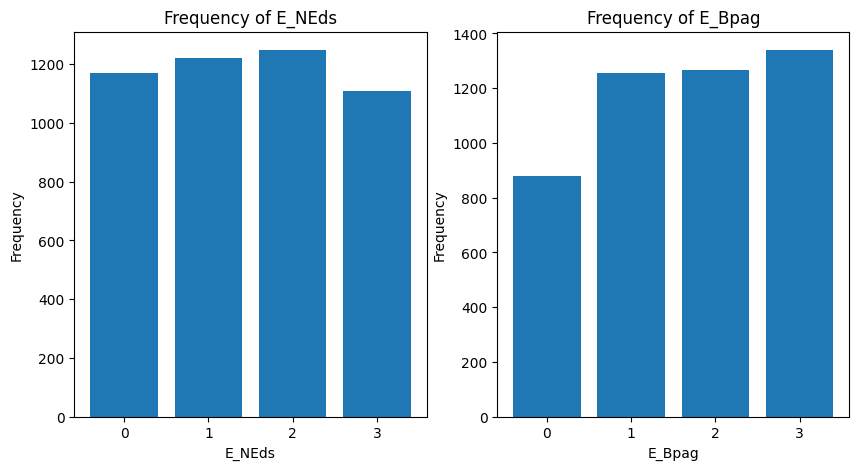

In [ ]:
# Create a figure and two axis objects side by side
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

# Calculate the frequency of each value in the E_NEds column
freq_E_NEds = df['E_NEds'].value_counts()

# Plot the frequency of E_NEds as a column graph on the first axis
ax1.bar(freq_E_NEds.index, freq_E_NEds.values)
ax1.set_xlabel('E_NEds')
ax1.set_ylabel('Frequency')
ax1.set_title('Frequency of E_NEds')

# Calculate the frequency of each value in the E_Bpag column
freq_E_Bpag = df['E_Bpag'].value_counts()

# Plot the frequency of E_Bpag as a column graph on the second axis
ax2.bar(freq_E_Bpag.index, freq_E_Bpag.values)
ax2.set_xlabel('E_Bpag')
ax2.set_ylabel('Frequency')
ax2.set_title('Frequency of E_Bpag')

# Show the plot
plt.show()

Um atributo que mostrou ter um potencial relevante na classificação é o de pagesWomen. Fizemos uma relação sum(pagesWomen) / sum(NEds), ou seja do somatório de edições feitas em páginas de mulheres sobre o somatório de edições totais entre homens e mulheres e tivemos o seguinte resultado:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# filter DataFrame to only include rows where C_api is 'unknown'
female_df = df[df['gender'] == 'female']
male_df = df[df['gender'] == 'male']

female_ratio = female_df['pagesWomen'].sum() / female_df['NEds'].sum() * 100
male_ratio = male_df['pagesWomen'].sum() / male_df['NEds'].sum() * 100

print(f'Porcentagem feminino: {round(female_ratio*100, 2)}%')
print(f'Porcentagem masculino: {round(male_ratio*100, 2)}%')

Porcentagem feminino: 10.6%
Porcentagem masculino: 1.29%


Com isso, percebemos que as mulheres em média editam 8,15 vezes mais páginas relacionadas a mulheres do que os homens. Esse atributo deve ser bastante importante para a classificação de gênero.

Como podemos observar abaixo, não há nenhuma anomalia nas distribuições das colunas. Elas estão com seus quartis com o valor 0 são as que correspondem à edição de locais muito específicos, como páginas relacionadas à mulheres quando já vimos que a maioria dos usuários são homens.

In [ ]:
df.describe()

,firstYear,firstMonth,firstDay,lastYear,lastMonth,lastDay,NEds,NDays,NActDays,NPages,NPcreated,pagesWomen,wikiprojWomen,ns_user,ns_wikipedia,ns_talk,ns_userTalk,ns_content,weightIJ,NIJ
count,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000
mean,2009.875685,6.449431,15.884956,2015.419722,6.787611,16.113780,2029.969448,2036.607880,183.162663,689.451960,43.479140,0.438896,0.439949,74.372946,74.368310,49.947745,96.081753,1521.886641,1.000000,867.148546
std,3.519168,3.444223,8.879182,1.745680,3.119466,9.341665,7793.300833,1336.119914,374.034481,3355.302483,297.395507,5.327440,17.832244,246.407233,560.782479,215.554281,545.025818,6099.009235,0.325763,325.933076
min,2002.000000,1.000000,1.000000,2012.000000,1.000000,1.000000,50.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.411985,297.000000
25%,2007.000000,3.000000,8.000000,2014.000000,4.000000,8.000000,95.000000,835.250000,24.000000,29.000000,1.000000,0.000000,0.000000,4.000000,0.000000,0.000000,1.000000,61.000000,0.831954,664.000000
50%,2009.000000,7.000000,16.000000,2016.000000,7.000000,16.000000,218.000000,2035.500000,53.000000,68.000000,4.000000,0.000000,0.000000,14.000000,1.000000,4.000000,5.000000,151.000000,0.997535,917.000000
75%,2013.000000,9.000000,24.000000,2017.000000,9.000000,25.000000,757.750000,3146.500000,154.000000,219.750000,14.000000,0.000000,0.000000,46.000000,8.000000,19.000000,22.000000,563.750000,1.057149,994.000000
max,2017.000000,12.000000,31.000000,2017.000000,12.000000,31.000000,153193.000000,5349.000000,3843.000000,94142.000000,13394.000000,185.000000,949.000000,6041.000000,24392.000000,4788.000000,12350.000000,115547.000000,1.865008,1596.000000


Agora, para fazer uma análise geral de importância das features, vamos preparar os dados e usar a random forest. 

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


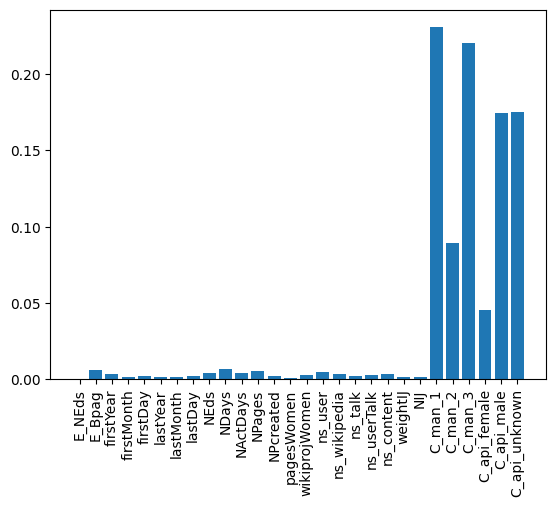

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder(sparse=False)

# create a list of the categorical columns you want to encode
cat_columns = ['C_man', 'C_api']

# fit and transform the categorical columns using the OneHotEncoder
cat_encoded = onehot_encoder.fit_transform(df[cat_columns])

# construct the names of the encoded categories
cat_names = []
for i, column in enumerate(cat_columns):
    for category in onehot_encoder.categories_[i]:
        cat_names.append(f'{column}_{category}')

# create a new dataframe using the encoded columns and the original columns from df
df_encoded = pd.concat([df.drop(cat_columns, axis=1), pd.DataFrame(cat_encoded, columns=cat_names)], axis=1)
X, y = df_encoded.drop(['gender'], axis=1) , df['gender']

# create a Random Forest classifier
rf = RandomForestClassifier()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=10)

# train the model on the training set
rf.fit(X_train, y_train)

# get feature importance
importance = rf.feature_importances_

# visualize feature importance
plt.bar(range(X.shape[1]), importance)
plt.xticks(range(X.shape[1]), X.columns, rotation=90)
plt.show()

Podemos ver que a feature mais importante é a classificação que os pesquisadores que criaram o dataset deram pra cada instância, que está representada pela coluna "C_man".<br> O segundo atributo mais importante é o gênero declarado pelo próprio usuário, represntado pela coluna "C_api". <br> A coluna "C_man" não será usada pelos nossos modelos, já que ela representa um gabarito e não um dado dos encontrado no problema.<br>
Para entender mais sobre as outras features, vamos plotar novamente o gráfico de importância retirando essas duas features

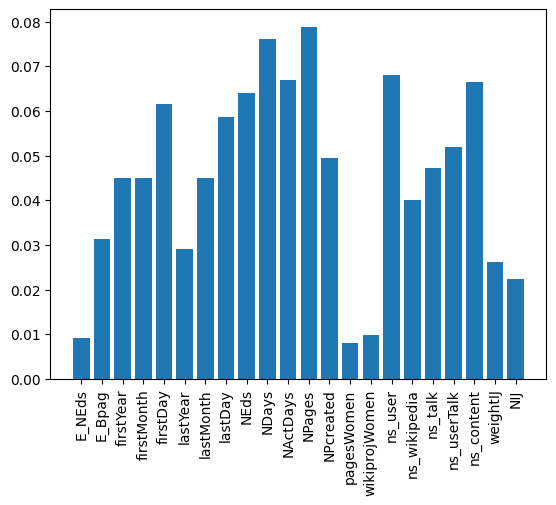

Importance of 'pagesWomen': 0.008026097594868577


In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X, y = df.drop(['gender','C_api','C_man'], axis=1) , df['gender']

# create a Random Forest classifier
rf = RandomForestClassifier()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=10)

# train the model on the training set
rf.fit(X_train, y_train)

# get feature importance
importance = rf.feature_importances_

# visualize feature importance
plt.bar(range(X.shape[1]), importance)
plt.xticks(range(X.shape[1]), X.columns, rotation=90)
plt.show()

# find the index of 'pagesWomen' column in the X DataFrame
idx = X.columns.get_loc('pagesWomen')

# print the feature importance of 'pagesWomen'
print(f"Importance of 'pagesWomen': {importance[idx]}")

Podemos ver que as features mais importantes são relacionadas a frequência de atividade do editor. "NDays", "NPages", "NActDays", "ns_user", "ns_content" foram as features mais importantes. <br> A feature relacionada quantas páginas editadas relacionadas a conteúdo feminino teve a pior importância. <br> Como issso não é esperado, vamos usar essas variáveis de forma balanceada como citamos anteriormente nesta sessão e ver se temos alguma melhora.

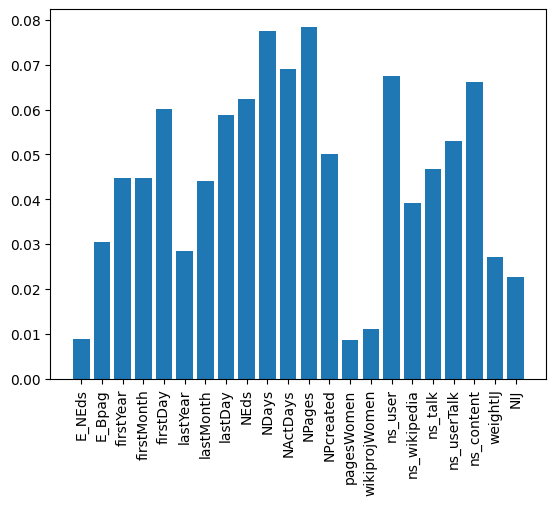

Importance of 'pagesWomen': 0.00857624167747862


In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X, y = df.drop(['gender','C_api','C_man'], axis=1) , df['gender']

X['pagesWomen'] = X['pagesWomen'] / X['NEds']


# create a Random Forest classifier
rf = RandomForestClassifier()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=10)

# train the model on the training set
rf.fit(X_train, y_train)

# get feature importance
importance = rf.feature_importances_

# visualize feature importance
plt.bar(range(X.shape[1]), importance)
plt.xticks(range(X.shape[1]), X.columns, rotation=90)
plt.show()

# find the index of 'pagesWomen' column in the X DataFrame
idx = X.columns.get_loc('pagesWomen')

# print the feature importance of 'pagesWomen'
print(f"Importance of 'pagesWomen': {importance[idx]}")

Podemos ver que apesar de pequena, a importância da feature "pagesWomen" melhorou de .80% para .86% quando utilizamos ela balanceada com o número de edições total do usuário. Isso sinaliza que as features que apresentam a quantidade absoluta de um determinado tipo de atividade pode ser melhorada pela divisão do total de atividades do usuário.<br>Além, podemos perceber que ainda precisamos tratar várias features, como as de relacionadas data para que apresentem um único valor quantitativo ao invés de dia mês e ano separados. <br>
Também vale destacar que a base de dados não apresenta valores nulos, mas apresenta alguns valores com a classificação "unknown". Esses valores não devem ser usadas no treinamento de um modelo de classificação, já que a classificar algo como desconhecido não é o nosso objetivo, e sim classificar entre gênero masculino ou feminino.

# Pré-Processamento dos Dados

Primeiro trazemos os dados em um dataframe, e usamos head() e info() para ter uma ver como os dados se apresentam.

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/jfmvs/AM-Projeto-1/main/data.csv')
df.head()

,gender,C_api,C_man,E_NEds,E_Bpag,firstDay,lastDay,NEds,NDays,NActDays,...,NPcreated,pagesWomen,wikiprojWomen,ns_user,ns_wikipedia,ns_talk,ns_userTalk,ns_content,weightIJ,NIJ
0,1,male,1,2,2,20170527205915,20170721044501,543,56,43,...,4,0,0,91,28,6,76,324,0.915024,978
1,0,unknown,3,3,1,20110301072441,20170731213735,2764,2345,514,...,7,0,0,100,249,183,646,1526,0.661673,477
2,1,male,1,0,2,20060907204302,20140911191722,57,2927,25,...,0,0,0,3,0,1,3,49,0.800528,664
3,1,male,1,1,2,20121003144916,20121208180528,104,67,5,...,2,0,0,20,1,2,2,78,1.027717,841
4,0,unknown,3,1,1,20070311125035,20141106121057,184,2798,27,...,0,0,0,26,10,5,24,112,0.997535,994


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         4746 non-null   int64  
 1   C_api          4746 non-null   object 
 2   C_man          4746 non-null   int64  
 3   E_NEds         4746 non-null   int64  
 4   E_Bpag         4746 non-null   int64  
 5   firstDay       4746 non-null   int64  
 6   lastDay        4746 non-null   int64  
 7   NEds           4746 non-null   int64  
 8   NDays          4746 non-null   int64  
 9   NActDays       4746 non-null   int64  
 10  NPages         4746 non-null   int64  
 11  NPcreated      4746 non-null   int64  
 12  pagesWomen     4746 non-null   int64  
 13  wikiprojWomen  4746 non-null   int64  
 14  ns_user        4746 non-null   int64  
 15  ns_wikipedia   4746 non-null   int64  
 16  ns_talk        4746 non-null   int64  
 17  ns_userTalk    4746 non-null   int64  
 18  ns_conte

Usando o a função describe, podemos ver como os dados numéricos estão distribuidos.
Vamos destacar alguns pontos:


*   Temos uma grande variação no NEds, que representa o número de edições feitas pelo usuário. O número varia desde 50 até mais de 100.000. Com isso temos vários outros atributos importantes relacionadas a ele como pagesWomen, que é número de edições em uma página sobre uma mulher, também variando bastante.
*   Consideramos que estes atributos estão muito relacionados, por exemplo: um usuário com o atributo pagesWomen=10 pode ser considerado muito se seu NEds=100, mas pode ser pouco se seu NEds for 2.000.
*   Com isso, optamos por usar esses atributos em forma de uma razão sobre o NEds.



In [ ]:
pd.options.display.float_format = '{:.2f}'.format
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,4746.00,0.74,0.59,0.00,0.00,1.00,1.00,2.00
C_man,4746.00,2.08,0.96,1.00,1.00,3.00,3.00,3.00
E_NEds,4746.00,1.48,1.10,0.00,1.00,1.00,2.00,3.00
E_Bpag,4746.00,1.65,1.08,0.00,1.00,2.00,3.00,3.00
firstDay,4746.00,20099417813055.11,35163369148.62,20020114163735.00,20070421145894.00,20091209092717.00,20130404647226.50,20170929215032.00
lastDay,4746.00,20154892225918.93,17481035176.20,20120103173838.00,20140702404393.00,20160721153408.50,20170726826821.75,20171002030328.00
NEds,4746.00,2029.97,7793.30,50.00,95.00,218.00,757.75,153193.00
NDays,4746.00,2036.61,1336.12,1.00,835.25,2035.50,3146.50,5349.00
NActDays,4746.00,183.16,374.03,1.00,24.00,53.00,154.00,3843.00
NPages,4746.00,689.45,3355.30,1.00,29.00,68.00,219.75,94142.00


In [ ]:
# estamos passando essas variaveis de um numero para porcentagem
df['pagesWomen'] =   df['pagesWomen'] / df['NEds']
df['wikiprojWomen'] =   df['wikiprojWomen'] / df['NEds']
df['ns_user'] =   df['ns_user'] / df['NEds']
df['ns_wikipedia'] =   df['ns_wikipedia'] / df['NEds']
df['ns_talk'] =   df['ns_talk'] / df['NEds']
df['ns_userTalk'] =   df['ns_userTalk'] / df['NEds']
df['ns_content'] =   df['ns_content'] / df['NEds']

A mesma ideia foi considerada para gerar novas features considerando o total de dias entre sua primeira e última edição. <p>
Vamos usar a relação do número de dias ativos e também o número de edições por dia como novas features. 

In [ ]:
df['NEds/NDays'] = df['NEds']/df['NDays']
df['NActDays/NDays'] = df['NActDays']/df['NDays']

Agora vamos observar os valores únicos:

In [ ]:
df.nunique()

gender               3
C_api                3
C_man                3
E_NEds               4
E_Bpag               4
firstDay          4746
lastDay           4746
NEds              1685
NDays             2855
NActDays           792
NPages            1050
NPcreated          335
pagesWomen         254
wikiprojWomen       56
ns_user           3448
ns_wikipedia      2143
ns_talk           2554
ns_userTalk       2740
ns_content        3848
weightIJ            16
NIJ                 16
NEds/NDays        4682
NActDays/NDays    4505
dtype: int64

NIJ e weightIJ são relativos ao Stratum que combina E_NEds e E_Bpag, por isso temos 16 valores para cada, já que 4x4=16. Como essas informações são a respeito do Stratum, que já é uma informação presente em E_NEds e E_Bpag, vamos remover essas colunas

In [ ]:
df = df.drop(['C_man','NIJ','weightIJ'],axis=1)

Outra questão importante foi com relação as datas de primeira postagem e última postagem. As datas se apresentam nos dados com uma precisão até o segundo. Como não queremos descartar esses dados de cara, mas também não queremos colocar informações que podem irrelevantes para os modelos, optamos por representar essas datas como: (ano) + ((mês - 1)/12). Assim, temos por exemplo a representação de julho de 2011 como 2011.5 .

In [ ]:
df['firstDay'] = df['firstDay'].astype(str)
firstMonth = df['firstDay'].str.slice(4, 6).astype(int)
firstYear = df['firstDay'].str.slice(0, 4).astype(int)
df['firstYear'] = firstYear + (firstMonth - 1) /12

df['lastDay'] = df['lastDay'].astype(str)
lastMonth = df['lastDay'].str.slice(4, 6).astype(int)
lastYear = df['lastDay'].str.slice(0, 4).astype(int)
df['lastYear'] = lastYear + (lastMonth - 1) /12
df = df.drop(['firstDay','lastDay'],axis=1)

Vamos agora, definir as variavéis que são categóricas. Para fim de clareza, vamos substituir os valores de 0, 1 e 2 na na categoria para 'unknown', 'male' e 'female'.

In [ ]:

df['gender'] = df['gender'].replace({0: 'unknown', 1: 'male', 2: 'female'})
df['gender'] = df['gender'].astype('category')
df['C_api'] =   df['C_api'].astype('category')
df['E_NEds'] =   df['E_NEds'].astype('category')
df['E_Bpag'] = df['E_Bpag'].astype('category')



df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   gender          4746 non-null   category
 1   C_api           4746 non-null   category
 2   E_NEds          4746 non-null   category
 3   E_Bpag          4746 non-null   category
 4   NEds            4746 non-null   int64   
 5   NDays           4746 non-null   int64   
 6   NActDays        4746 non-null   int64   
 7   NPages          4746 non-null   int64   
 8   NPcreated       4746 non-null   int64   
 9   pagesWomen      4746 non-null   float64 
 10  wikiprojWomen   4746 non-null   float64 
 11  ns_user         4746 non-null   float64 
 12  ns_wikipedia    4746 non-null   float64 
 13  ns_talk         4746 non-null   float64 
 14  ns_userTalk     4746 non-null   float64 
 15  ns_content      4746 non-null   float64 
 16  NEds/NDays      4746 non-null   float64 
 17  NActDays/NDays

Como temos valores desconhecidos com a classificação desconhecida na base de dados, vamos ignora-los num primeiro momento de treinamento do modelo.

In [ ]:
df = df.drop(df[df['gender'] == 'unknown'].index)

É importante pensarmos também na possível utilização dessas linhas com a categoria 'unkown' já que eram boa parte do conjunto de dados. Poderíamos testar já na parte de modelagem a substituição desse valor pela média, mediana ou até criar um modelo simples para preencher esse dado que pode ser considerado 'NaN'.

In [ ]:
df.shape

(3145, 20)

Também é importante checar se temos valores nulos, faltando ou duplicado, verificamos que não temos probelmas quanto a isso.

In [ ]:
print('Null:','\n',df.isnull().sum())
print('Missing values:',df.isna().values.sum())

Null: 
 gender            0
C_api             0
E_NEds            0
E_Bpag            0
NEds              0
NDays             0
NActDays          0
NPages            0
NPcreated         0
pagesWomen        0
wikiprojWomen     0
ns_user           0
ns_wikipedia      0
ns_talk           0
ns_userTalk       0
ns_content        0
NEds/NDays        0
NActDays/NDays    0
firstYear         0
lastYear          0
dtype: int64
Missing values: 0


In [ ]:
df.duplicated().sum()

0

Por fim temos nossos dados preparados para os modelos:

In [ ]:
df.head()

,gender,C_api,E_NEds,E_Bpag,NEds,NDays,NActDays,NPages,NPcreated,pagesWomen,wikiprojWomen,ns_user,ns_wikipedia,ns_talk,ns_userTalk,ns_content,NEds/NDays,NActDays/NDays,firstYear,lastYear
0,male,male,2,2,543,56,43,204,4,0.00,0.00,0.17,0.05,0.01,0.14,0.60,9.70,0.77,2017.33,2017.50
2,male,male,0,2,57,2927,25,25,0,0.00,0.00,0.05,0.00,0.02,0.05,0.86,0.02,0.01,2006.67,2014.67
3,male,male,1,2,104,67,5,66,2,0.00,0.00,0.19,0.01,0.02,0.02,0.75,1.55,0.07,2012.75,2012.92
5,male,male,3,1,1887,4130,197,510,62,0.00,0.00,0.00,0.00,0.02,0.01,0.88,0.46,0.05,2006.33,2017.67
7,male,unknown,3,3,5833,3209,566,376,108,0.00,0.00,0.03,0.00,0.00,0.03,0.81,1.82,0.18,2008.83,2017.58


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3145 entries, 0 to 4745
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   gender          3145 non-null   category
 1   C_api           3145 non-null   category
 2   E_NEds          3145 non-null   category
 3   E_Bpag          3145 non-null   category
 4   NEds            3145 non-null   int64   
 5   NDays           3145 non-null   int64   
 6   NActDays        3145 non-null   int64   
 7   NPages          3145 non-null   int64   
 8   NPcreated       3145 non-null   int64   
 9   pagesWomen      3145 non-null   float64 
 10  wikiprojWomen   3145 non-null   float64 
 11  ns_user         3145 non-null   float64 
 12  ns_wikipedia    3145 non-null   float64 
 13  ns_talk         3145 non-null   float64 
 14  ns_userTalk     3145 non-null   float64 
 15  ns_content      3145 non-null   float64 
 16  NEds/NDays      3145 non-null   float64 
 17  NActDays/NDays

Para fazer a divisão de dados para treino, teste e validação, precisamos levar usaremos um split estratificado pelo gênero, o que é muito importante neste caso pois os dados estão desbalanceados, com muitos mais ocorrências de 'male'.

In [ ]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.3, random_state=8, stratify=df['gender'])
#train_df, valid_df = train_test_split(train_df, test_size=0.2, random_state=8, stratify=train_df['gender'])

X_train, y_train = train_df.drop(['gender'],axis=1), train_df['gender']
X_test, y_test = test_df.drop(['gender'],axis=1), test_df['gender']
#X_valid, y_valid = valid_df.drop(['gender'],axis=1), valid_df['gender']

In [ ]:
print(X_train.shape)
print(X_test.shape)
#print(X_valid.shape)

(2201, 19)
(944, 19)


Para alguns modelos, é necessário fazer o uso do OneHotEnconder para se obter valores númericos.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
onehot = make_column_transformer((OneHotEncoder(handle_unknown='ignore'),['C_api','E_NEds','E_Bpag']),remainder='passthrough')
X_train_oh = onehot.fit_transform(X_train)
X_train_oh = pd.DataFrame(X_train_oh,columns=onehot.get_feature_names_out())

In [ ]:
X_train_oh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2201 entries, 0 to 2200
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   onehotencoder__C_api_female   2201 non-null   float64
 1   onehotencoder__C_api_male     2201 non-null   float64
 2   onehotencoder__C_api_unknown  2201 non-null   float64
 3   onehotencoder__E_NEds_0       2201 non-null   float64
 4   onehotencoder__E_NEds_1       2201 non-null   float64
 5   onehotencoder__E_NEds_2       2201 non-null   float64
 6   onehotencoder__E_NEds_3       2201 non-null   float64
 7   onehotencoder__E_Bpag_0       2201 non-null   float64
 8   onehotencoder__E_Bpag_1       2201 non-null   float64
 9   onehotencoder__E_Bpag_2       2201 non-null   float64
 10  onehotencoder__E_Bpag_3       2201 non-null   float64
 11  remainder__NEds               2201 non-null   float64
 12  remainder__NDays              2201 non-null   float64
 13  rem

In [ ]:
X_train_oh.head()

,onehotencoder__C_api_female,onehotencoder__C_api_male,onehotencoder__C_api_unknown,onehotencoder__E_NEds_0,onehotencoder__E_NEds_1,onehotencoder__E_NEds_2,onehotencoder__E_NEds_3,onehotencoder__E_Bpag_0,onehotencoder__E_Bpag_1,onehotencoder__E_Bpag_2,...,remainder__wikiprojWomen,remainder__ns_user,remainder__ns_wikipedia,remainder__ns_talk,remainder__ns_userTalk,remainder__ns_content,remainder__NEds/NDays,remainder__NActDays/NDays,remainder__firstYear,remainder__lastYear
0,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,...,0.00,0.08,0.00,0.05,0.02,0.78,0.80,0.19,2012.42,2017.58
1,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,...,0.00,0.03,0.24,0.01,0.02,0.51,2.38,0.26,2009.83,2017.67
2,0.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,...,0.00,0.26,0.00,0.00,0.00,0.74,1.24,0.15,2015.33,2015.50
3,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,...,0.00,0.98,0.00,0.00,0.00,0.00,0.06,0.01,2011.00,2015.75
4,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,...,0.00,0.01,0.00,0.01,0.03,0.90,2.20,0.37,2012.83,2017.67


Por fim normalizando as features para que fiquem na mesma escala:

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train_oh)
X_train_oh = pd.DataFrame(scaler.transform(X_train_oh),columns = X_train_oh .columns)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2201 entries, 3874 to 1248
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   C_api           2201 non-null   category
 1   E_NEds          2201 non-null   category
 2   E_Bpag          2201 non-null   category
 3   NEds            2201 non-null   int64   
 4   NDays           2201 non-null   int64   
 5   NActDays        2201 non-null   int64   
 6   NPages          2201 non-null   int64   
 7   NPcreated       2201 non-null   int64   
 8   pagesWomen      2201 non-null   float64 
 9   wikiprojWomen   2201 non-null   float64 
 10  ns_user         2201 non-null   float64 
 11  ns_wikipedia    2201 non-null   float64 
 12  ns_talk         2201 non-null   float64 
 13  ns_userTalk     2201 non-null   float64 
 14  ns_content      2201 non-null   float64 
 15  NEds/NDays      2201 non-null   float64 
 16  NActDays/NDays  2201 non-null   float64 
 17  firstYear  

In [ ]:
train_temp = X_train[['C_api','E_NEds','E_Bpag']]
X_train = X_train.drop(['C_api','E_NEds','E_Bpag'],axis=1)
scaler_n = MinMaxScaler()
scaler_n.fit(X_train)
X_train = pd.DataFrame(scaler_n.transform(X_train),columns = X_train .columns)
X_train = pd.concat([X_train,train_temp],axis=1)

## Aplicando os transformadores treinados apenas com o conjunto de trainemento nos de  validação e teste

In [ ]:
X_test1 = pd.DataFrame(onehot.transform(X_test),columns=onehot.get_feature_names_out())
#X_valid1 = pd.DataFrame(onehot.transform(X_valid),columns=onehot.get_feature_names_out())

In [ ]:
X_test1 = pd.DataFrame(scaler.transform(X_test1),columns = X_test1.columns)
#X_valid1 = pd.DataFrame(scaler.transform(X_valid1),columns = X_valid1.columns)                    

Para concluir, gostariamos de salientar que o processo de treinamento de modelos de machine learning é um ciclico e requer muita experimentação. Decisões feitas nessa etapa podem ser revisitadas a partir dos resultados obtidos nas próximas etapas, em busca de um melhor modelo.<p>
Algumas alterações como as transformações feitas quanto ao número de edições em certos contextos de seu valor absoluto para porcentagem, serão testadas para atestar se elas melhoram ou não os modelos.

# Modelagem

Para buscar os melhores parâmetros usamos as ferramentas GridSearch e RandomSearch, criamos o dicionário com os possíveis parâmetros e nos foram retornados os melhores. Entretanto, após rodar com o scoring padrão dessas ferramentas percebemos que a acurácia não é a melhor métrica para avaliação, rodamos duas vezes então, a primeira com a acurácia e depois com a métrica ROC-AUC.
	
Entendendo melhor as duas métricas:

Acurácia: Calcula o total de predições corretas em relação ao total de predições. Útil em conjuntos de dados balanceados mas pode ser falha em conjuntos não balanceados uma vez que o modelo prevendo a classe majoritária terá um alto valor.

ROC-AUC: Mede a capacidade do modelo de distinguir entre duas classes, tem como base a taxa de verdadeiros positivos em relação à taxa de falsos positivos. Eficaz em dados não balanceados.

Como o nosso dataset tem em foco a discrepância entre editores homens e mulheres na Wikipedia, se encaixa como desbalanceado.


## Busca com ROC-AUC

### kNN

Variando vários parâmetros do kNN :

N_neighbors: Quantidade de vizinhos mais próximos que serão considerados para o cálculo, escolhemos o intervalo de 1~30 vizinhos.

Weights: Determina como os vizinhos mais próximos serão ponderados, tem dois valores ‘uniform’ e ‘distance’ que servem para conjuntos de dados mais balanceados e não, respectivamente. Interessante para o nosso caso.

Algorithm: Estratégia utilizada para calcular os vizinhos mais próximos, podendo levar a um modelo mais eficiente.

Metric: Método de cálculo da distância entre as amostras, afeta significativamente o desempenho do modelo.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Definindo os valores para os parâmetros que queremos testar
k_range = list(range(1, 31))

# Criando um dicionário com as opções de parâmetros
param_grid = {'n_neighbors' : k_range, 'weights': ['uniform', 'distance'],
              'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
              'metric':['minkowski','chebyshev','manhattan','euclidean',]}

# Criando o objeto GridSearchCV
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=10, scoring='roc_auc')

# Ajustando o modelo com os dados de treino
grid.fit(X_train_oh, y_train)

# Imprimindo os melhores parâmetros e a melhor pontuação
print("Melhores parâmetros:", grid.best_params_)
print("Melhor pontuação:", grid.best_score_)

Melhores parâmetros: {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 30, 'weights': 'distance'}
Melhor pontuação: 0.9281898940345368


Aqui podemos ver que o 'mahalanobis' não é compatível com o algoritmo 'kd_tree'

In [ ]:
import sklearn.neighbors
sorted(sklearn.neighbors.VALID_METRICS['kd_tree'])

['chebyshev',
 'cityblock',
 'euclidean',
 'infinity',
 'l1',
 'l2',
 'manhattan',
 'minkowski',
 'p']

Rodando o Gridsearch agora com parâmetros específicos para a métrica 'mahalanobis', tirando o algoritmo 'kd_tree' por não serem compatíveis

In [ ]:
from sklearn.covariance import LedoitWolf
cov = LedoitWolf().fit(X_train_oh).covariance_
param_grid_2 = {'n_neighbors' : k_range, 'weights': ['uniform', 'distance'],
              'algorithm':['auto', 'ball_tree', 'brute'],
              'metric':['mahalanobis'], 'metric_params': [{'VI': cov}]}



knn_2 = KNeighborsClassifier()
grid_2 = GridSearchCV(knn_2, param_grid_2, cv=10, scoring='roc_auc')

# Ajustando o modelo com os dados de treino
grid_2.fit(X_train_oh, y_train)

# Imprimindo os melhores parâmetros e a melhor pontuação
print("Melhores parâmetros:", grid_2.best_params_)
print("Melhor pontuação:", grid_2.best_score_)

Melhores parâmetros: {'algorithm': 'auto', 'metric': 'mahalanobis', 'metric_params': {'VI': array([[ 5.45550811e-02, -2.98848774e-02, -2.41999706e-02,
         7.35058500e-03, -6.01837104e-04, -3.94818281e-03,
        -2.80056508e-03,  3.06667934e-03, -4.19294222e-04,
        -1.35829152e-03, -1.28909360e-03,  1.43815900e-04,
        -7.86309532e-03, -3.44351623e-04,  1.35444556e-04,
        -2.31455129e-05,  2.46293586e-04,  1.31584913e-03,
         3.55830998e-03,  5.12350664e-04, -4.07676900e-04,
         1.24323475e-03, -3.02535300e-03, -1.90282688e-05,
         5.42389437e-04,  6.92075971e-03, -1.16141684e-03],
       [-2.98848774e-02,  2.48726498e-01, -2.18371388e-01,
        -4.08419677e-02,  1.93199772e-03,  2.05868946e-03,
         3.68512805e-02,  2.99008936e-03, -5.91159680e-03,
        -1.17051259e-02,  1.46266334e-02,  3.36764601e-03,
         6.81318445e-03,  9.05665973e-03,  1.87675020e-03,
         1.39434960e-03, -2.63584216e-04, -6.98561262e-04,
        -1.04422007e-0

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define os parâmetros a serem testados
param_grid = {'max_depth': np.arange(1, 11, 2),
              'min_samples_leaf': np.arange(5, 51,5),
              'criterion': ['gini', 'entropy','log_loss'],
              'splitter': ['best','random'],
              'min_impurity_decrease': [0.0, 0.1, 0.2, 0.3],
              'random_state':[10]}

# Cria o modelo de árvore de decisão
tree_model = DecisionTreeClassifier()

# Realiza a busca de parâmetros usando a técnica de validação cruzada
grid_search = GridSearchCV(tree_model, param_grid, cv=10,scoring='roc_auc')
grid_search.fit(X_train_oh, y_train)

# Imprime os melhores parâmetros encontrados
print("Melhores parâmetros: ", grid_search.best_params_)
print("Melhor acurácia: ", grid_search.best_score_)



Melhores parâmetros:  {'criterion': 'gini', 'max_depth': 5, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 25, 'random_state': 10, 'splitter': 'random'}
Melhor acurácia:  0.9430069924123495


Vamos refinar a busca em torno do melhor 'min_sample_leaf', 'max_depth' e 'min_impurity_decrease':

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define os parâmetros a serem testados
param_grid = {'max_depth': np.arange(5, 9),
              'min_samples_leaf': np.arange(22, 29),
              'criterion': ['gini'],
              'min_impurity_decrease': [0.0, 0.025, 0.05, 0.075],
              'random_state':[10]}

# Cria o modelo de árvore de decisão
tree_model = DecisionTreeClassifier()

# Realiza a busca de parâmetros usando a técnica de validação cruzada
grid_search = GridSearchCV(tree_model, param_grid, cv=10,scoring='roc_auc')
grid_search.fit(X_train_oh, y_train)

# Imprime os melhores parâmetros encontrados
print("Melhores parâmetros: ", grid_search.best_params_)
print("Melhor acurácia: ", grid_search.best_score_)



Melhores parâmetros:  {'criterion': 'gini', 'max_depth': 7, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 25, 'random_state': 10}
Melhor acurácia:  0.9411893118785978


Tivemos os mesmos resultados para acurácia, logo podemos concluir que estamos próximos do limite do que o algoritmo pode nos dar. Abaixo podemos ver a árvore gerada.

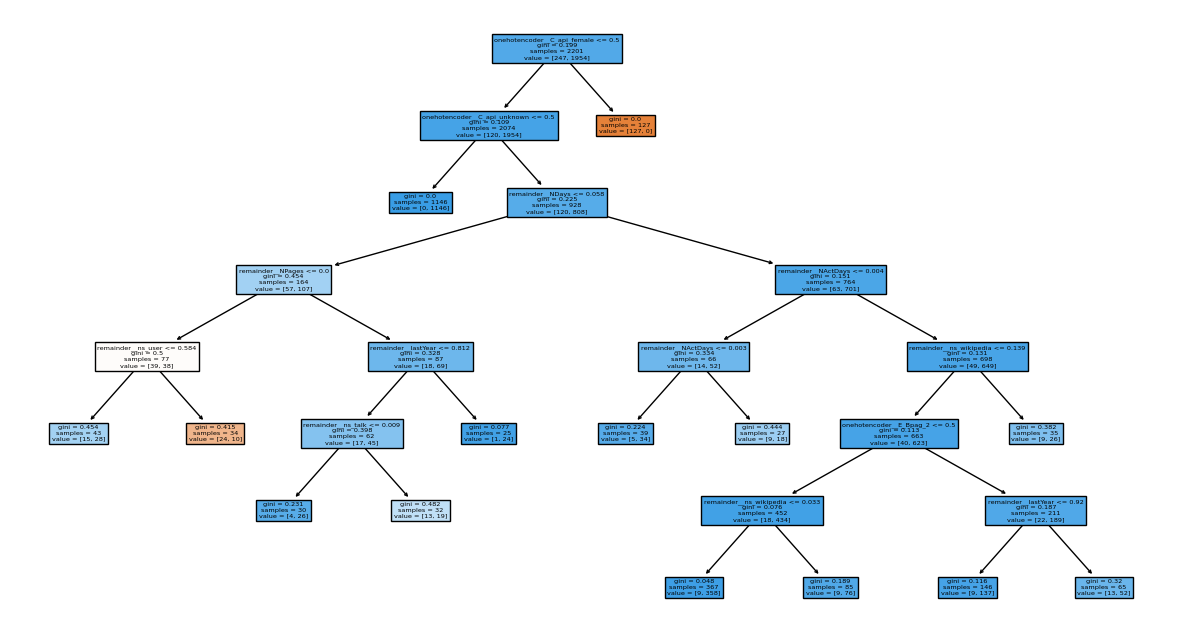

In [ ]:
from sklearn.tree import export_graphviz
from sklearn import tree
import graphviz

best_tree = grid_search.best_estimator_

plt.figure(figsize=(15, 8))
tree.plot_tree(best_tree, filled=True, feature_names=X_train_oh.columns)
plt.show()


Observando a árvore, podemos perceber quais foram os atributos mais significativos na classificação. O primeiro é se C_api_female (se o usuário se identificou como mulher), depois o C_api_unknown (se não se classificou) e em terceiro lugar NDays (número de dias ativo como editor).

### SVM

In [ ]:
from sklearn.svm import SVC

param_grid = {'C': [0.01, 0.1, 1, 10, 100],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'gamma': ['scale', 'auto'],
              'random_state':[10]}

# criando o modelo SVM
svm = SVC()

# criando um objeto GridSearchCV para buscar os melhores parâmetros
grid_search = GridSearchCV(svm, param_grid, cv=10, n_jobs=-1,scoring='roc_auc')

# treinando o modelo com a busca de parâmetros
grid_search.fit(X_train_oh, y_train)

    
# extraindo os melhores parâmetros encontrados pela busca
best_params = grid_search.best_params_
print(f'Melhores parâmetros: {best_params}')
print("Melhor acurácia: ", grid_search.best_score_)

Melhores parâmetros: {'C': 100, 'gamma': 'auto', 'kernel': 'rbf', 'random_state': 10}
Melhor acurácia:  0.9337839612768185


Vamos variar os parâmetros de 'C' em torno do melhor obitido para tentar encontrar um melhor valor.

In [ ]:
from sklearn.svm import SVC

param_grid = {'C': np.arange(.5, 1.51, 0.05),
              'kernel': ['poly'],
              'gamma': ['scale'],
              'random_state':[10]}

# criando o modelo SVM
svm = SVC()

# criando um objeto GridSearchCV para buscar os melhores parâmetros
grid_search = GridSearchCV(svm, param_grid, cv=10, n_jobs=-1,scoring='roc_auc')

# treinando o modelo com a busca de parâmetros
grid_search.fit(X_train_oh, y_train)
    
# extraindo os melhores parâmetros encontrados pela busca
best_params = grid_search.best_params_
print(f'Melhores parâmetros: {best_params}')
print("Melhor acurácia: ", grid_search.best_score_)

Melhores parâmetros: {'C': 1.5000000000000009, 'gamma': 'scale', 'kernel': 'poly', 'random_state': 10}
Melhor acurácia:  0.9003306645735216


Obtivemos uma leve melhora na acurácia, o que mostra que já estamos perto do limite do que esse algoritmo pode nos dar de modelo.

### Random Forest

O método da Random Forest, por gerar diversas árvores precisa de mais tempo para seu treino, por isso utilizamos o Random Search no lugar do Grid Search para acelerar nossas buscas por melhores parâmetros.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': np.arange(1, 11, 2),
    'min_impurity_decrease': [0.0, 0.1, 0.2, 0.3],
    'min_samples_leaf': np.arange(5, 51,5),
    'max_features': [.1, .3, .5, .7, .9],
    'bootstrap': [True, False],
    'random_state':[10]
}

# Cria o modelo de classificação
rfc = RandomForestClassifier()

# Realiza a busca de parâmetros com cross validation
grid_search = RandomizedSearchCV(estimator=rfc, param_distributions=param_grid,  n_iter=100, cv=10,scoring='roc_auc')
grid_search.fit(X_train_oh, y_train)

# Exibe o melhor conjunto de parâmetros e a acurácia correspondente
print(f"Melhores parâmetros: {grid_search.best_params_}")
print(f"Acurácia: {grid_search.best_score_}")

Melhores parâmetros: {'random_state': 10, 'n_estimators': 50, 'min_samples_leaf': 5, 'min_impurity_decrease': 0.0, 'max_features': 0.3, 'max_depth': 3, 'bootstrap': True}
Acurácia: 0.9504305991627419


Assim como fizemos nos outros métodos, vamos variar alguns parâmetros me busca de melhores resultados.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': np.arange(5, 10, 1),
    'min_impurity_decrease': [0.0],
    'min_samples_leaf': np.arange(10, 30,2),
    'max_features': [.6, .7, .8],
    'bootstrap': [True, False],
    'random_state':[10]
}


# Cria o modelo de classificação
rfc = RandomForestClassifier()

# Realiza a busca de parâmetros com cross validation
grid_search = RandomizedSearchCV(estimator=rfc, param_distributions=param_grid,  n_iter=30, cv=10,scoring='roc_auc')
grid_search.fit(X_train_oh, y_train)

# Exibe o melhor conjunto de parâmetros e a acurácia correspondente
print(f"Melhores parâmetros: {grid_search.best_params_}")
print(f"Acurácia: {grid_search.best_score_}")

Melhores parâmetros: {'random_state': 10, 'n_estimators': 200, 'min_samples_leaf': 10, 'min_impurity_decrease': 0.0, 'max_features': 0.6, 'max_depth': 6, 'bootstrap': False}
Acurácia: 0.9506139128728414


### LVQ

In [ ]:
pip install sklearn_lvq

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Variando alguns parâmetros do LVQ como:

 max_iter: Número máximo de iterações para o modelo convergir e não ficar treinando infinitamente.

 prototyper_per_class: Número de protótipos criados para cada classe, exemplos de treinamentos aleatórios que representam cada classe.

 beta: Fator de redução da taxa de aprendizado a cada iteração.


In [ ]:
from sklearn_lvq import GlvqModel

# Definindo os parâmetros a serem testados
param_grid = {
    'max_iter':[200,400,1000,2500],
    'prototypes_per_class': [1, 2, 3],
    'beta': [1, 2, 5]
}

# Criando o modelo GLVQ
model = GlvqModel()

# Criando o objeto de busca de parâmetros com validação cruzada
grid_search = GridSearchCV(model, param_grid=param_grid, cv=10,scoring='roc_auc')

# Realizando a busca de parâmetros com validação cruzada
grid_search.fit(X_train_oh, y_train)

# Imprimindo os melhores parâmetros encontrados
print("Melhores parâmetros:", grid_search.best_params_)
print("Melhor pontuação:", grid_search.best_score_)


Melhores parâmetros: {'beta': 5, 'max_iter': 1000, 'prototypes_per_class': 2}
Melhor pontuação: 0.8892885138670852


Usando o label encoder nas classes para usar outra ferramenta do LVQ

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_trainle = le.fit_transform(y_train)
y_testle = le.transform(y_test)

In [ ]:
counts = np.bincount(y_trainle)
num_zeros = counts[0]
num_ones = counts[1]

print(f"Número de ocorrências de 0: {num_zeros}")
print(f"Número de ocorrências de 1: {num_ones}")

Número de ocorrências de 0: 247
Número de ocorrências de 1: 1954


Dando mais ênfase no erro de predição em que classifica mulher como homem, já que temos muito mais homens em nosso dataset:

In [ ]:
from sklearn_lvq import GlvqModel

# Definindo os parâmetros a serem testados
param_grid = {
    'max_iter':[200,400],
    'prototypes_per_class': [1, 2,3],
    'beta': [1, 2, 5],
    'c': [[[0,1, 2], [1,0, 1]],[[0,1,1],[1,0,1]]]
}

# Criando o modelo GLVQ
model2 = GlvqModel()

# Criando o objeto de busca de parâmetros com validação cruzada
grid_search2 = GridSearchCV(model2, param_grid=param_grid, cv=10,scoring='roc_auc')

# Realizando a busca de parâmetros com validação cruzada
grid_search2.fit(X_train_oh, y_trainle)

# Imprimindo os melhores parâmetros encontrados
print("Melhores parâmetros:", grid_search2.best_params_)
print("Melhor pontuação:", grid_search2.best_score_)


Melhores parâmetros: {'beta': 5, 'c': [[0, 1, 1], [1, 0, 1]], 'max_iter': 200, 'prototypes_per_class': 3}
Melhor pontuação: 0.8962003270538986


Dando mais peso a esse erro foi visto como melhor.

### MLP

Variando o número de camadas ocultas, número de cneurônias em cada camada, função de ativação em cada camada oculta, complexidade da rede neural, taxa de aprendizado inicial, número máximo de iterações e se a taxa de aprendizado será constante ou adaptativa. 

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV

params = {
    'hidden_layer_sizes': [(20,), (50,50), (100,)],
    'activation': ['identity','logistic', 'tanh', 'relu'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': [600,1000], # Não converge com o padrão 200
    'learning_rate': ['constant', 'adaptive']
    }

mlp = MLPClassifier()
rf_random = RandomizedSearchCV(estimator = mlp, param_distributions = params, n_iter = 40, cv = 10,scoring='roc_auc')


rf_random.fit(X_train_oh, y_train)
print("Melhores parâmetros:", rf_random.best_params_)
print("Melhor pontuação:", rf_random.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


Melhores parâmetros: {'max_iter': 600, 'learning_rate_init': 0.001, 'learning_rate': 'adaptive', 'hidden_layer_sizes': (50, 50), 'alpha': 0.01, 'activation': 'tanh'}
Melhor pontuação: 0.9501906331763476


Rodando agora de forma mais robusta com mais camadas e com um teto maior de iterações fixo

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV

params2 = {
    'hidden_layer_sizes': [(50,50), (20,80,20)],
    'activation': ['tanh'],
    'alpha': [0.0001, 0.001],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': [1000],
    'learning_rate': ['constant', 'adaptive']
    }

mlp2 = MLPClassifier()
rf_random2 = RandomizedSearchCV(estimator = mlp2, param_distributions = params2, n_iter = 40, cv = 10,verbose=10,scoring='roc_auc')


rf_random2.fit(X_train_oh, y_train)
print("Melhores parâmetros:", rf_random2.best_params_)
print("Melhor pontuação:", rf_random2.best_score_)

Fitting 10 folds for each of 24 candidates, totalling 240 fits
[CV 1/10; 1/24] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant, learning_rate_init=0.001, max_iter=1000


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 24 is smaller than n_iter=40. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[CV 1/10; 1/24] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant, learning_rate_init=0.001, max_iter=1000;, score=0.958 total time=   3.3s
[CV 2/10; 1/24] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant, learning_rate_init=0.001, max_iter=1000
[CV 2/10; 1/24] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant, learning_rate_init=0.001, max_iter=1000;, score=0.974 total time=   3.0s
[CV 3/10; 1/24] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant, learning_rate_init=0.001, max_iter=1000
[CV 3/10; 1/24] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant, learning_rate_init=0.001, max_iter=1000;, score=0.932 total time=   3.2s
[CV 4/10; 1/24] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant, learning_rate_init=0.001, max_iter=1000
[CV 4/10; 1/24] END activation=

### Como a estratégia de hard voting utiliza a votação majoritária dos classificadores base para tomar uma decisão final, só é adequada para classificadores que retornam uma classe, e não uma pontuação de probabilidade.

###  Já a métrica roc_auc requer a pontuação de probabilidade para cada classe para calcular a área sob a curva ROC. Portanto, a estratégia de hard voting não é adequada para ser usada com a métrica roc_auc e não usaremos ela nos próximos dois modelos.

### Comitê de redes neurais

In [ ]:
from sklearn.ensemble import VotingClassifier

mlp1 = MLPClassifier(max_iter=1000, learning_rate_init=0.001, learning_rate='constant', hidden_layer_sizes=(50, 50), alpha=0.01, activation='tanh')
mlp2 = MLPClassifier(hidden_layer_sizes=(10),max_iter=1000,alpha=0.0001)
mlp3 = MLPClassifier(activation='tanh', alpha=0.001, hidden_layer_sizes=(20, 80, 20),max_iter=1000, learning_rate='adaptive', learning_rate_init=0.001)

# Definindo o Comitê de Redes Neurais
estimators = [('mlp1', mlp1), ('mlp2', mlp2), ('mlp3', mlp3)]
ensemble = VotingClassifier(estimators)

# Definindo penalização para a função de custo e o tipo de predição adotado pelo modelo
params = {
    'mlp1__alpha': [0.0001, 0.001, 0.01, 0.1],
    'mlp2__alpha': [0.0001, 0.001, 0.01, 0.1],
    'mlp3__alpha': [0.0001, 0.001, 0.01, 0.1],
    'voting': ['soft']
}

# Realizando a busca de hiperparâmetros com cross-validation
rf_random2 = RandomizedSearchCV(estimator = ensemble, param_distributions = params, n_iter = 5, cv = 10,verbose=3,scoring='roc_auc')
rf_random2.fit(X_train_oh, y_train)

print("Melhores parâmetros:", rf_random2.best_params_)
print("Melhor pontuação:", rf_random2.best_score_)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV 1/10] END mlp1__alpha=0.0001, mlp2__alpha=0.0001, mlp3__alpha=0.1, voting=soft;, score=0.961 total time=  10.0s
[CV 2/10] END mlp1__alpha=0.0001, mlp2__alpha=0.0001, mlp3__alpha=0.1, voting=soft;, score=0.973 total time=  10.3s
[CV 3/10] END mlp1__alpha=0.0001, mlp2__alpha=0.0001, mlp3__alpha=0.1, voting=soft;, score=0.932 total time=  12.0s
[CV 4/10] END mlp1__alpha=0.0001, mlp2__alpha=0.0001, mlp3__alpha=0.1, voting=soft;, score=0.955 total time=   8.9s
[CV 5/10] END mlp1__alpha=0.0001, mlp2__alpha=0.0001, mlp3__alpha=0.1, voting=soft;, score=0.957 total time=  10.6s
[CV 6/10] END mlp1__alpha=0.0001, mlp2__alpha=0.0001, mlp3__alpha=0.1, voting=soft;, score=0.920 total time=   6.2s
[CV 7/10] END mlp1__alpha=0.0001, mlp2__alpha=0.0001, mlp3__alpha=0.1, voting=soft;, score=0.931 total time=   8.6s
[CV 8/10] END mlp1__alpha=0.0001, mlp2__alpha=0.0001, mlp3__alpha=0.1, voting=soft;, score=0.956 total time=  12.1s
[CV 9/10] E

Podemos ver que houve um caso que mesmo com 1000 iterações não convergiu, conseguiu melhorar de forma minúscula comparado ao MLP sozinho.

### Comitê heterogêneo

Para gerar o comitê, vamos nos utilizar do nosso conhecimento prévio de na exploração dos melhores parâmetros para os diversos algoritmos.

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier

dtc = DecisionTreeClassifier(criterion='gini', max_depth=6, min_impurity_decrease=0.0, min_samples_leaf=25, random_state=10)
knn = KNeighborsClassifier(algorithm='kd_tree', metric='chebyshev', n_neighbors=25, weights='distance')
svm = SVC(C=0.7, gamma='scale', kernel='poly', random_state=10)
mlp = MLPClassifier(max_iter=1000, learning_rate_init=0.001, learning_rate='constant', hidden_layer_sizes=(50, 50), alpha=0.01, activation='tanh')

estimators = [('dtc', dtc), ('knn', knn), ('svm', svm), ('mlp', mlp)]
voting_clf = VotingClassifier(estimators, voting='hard')

params = {'voting': ['soft'],
          'weights': [[1, 1, 1, 1], [2, 1, 1, 1], [1, 2, 1, 1], [1, 1, 2, 1], [1, 1, 1, 2],
                      [2, 2, 1, 1], [2, 1, 2, 1], [2, 1, 1, 2], [1, 2, 2, 1], [1, 1, 2, 2], [1, 2, 1, 2]]}
grid_search = GridSearchCV(voting_clf, params, cv=10, verbose=1, n_jobs=-1,scoring='roc_auc')
grid_search.fit(X_train_oh, y_train)

# Imprime os resultados
print(f"Melhores parâmetros: {grid_search.best_params_}")
print(f"Acurácia: {grid_search.best_score_}")

Fitting 10 folds for each of 11 candidates, totalling 110 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Melhores parâmetros: {'voting': 'soft', 'weights': [1, 1, 1, 1]}
Acurácia: nan


Podemos perceber que a acurácia foi similar da dos modelos separados. Isso indica que os modelos a combinação dos modelos não nos trouxe nenhuma informação nova quanto a classificação do probleam, ou seja os modelos são independentes um do outro e para um melhor sistema de Comitê talvez fosse melhor buscar novos tipos de algoritmo.

# Avaliação

## Testes com search em acurácia

In [ ]:
knn = KNeighborsClassifier(algorithm = 'kd_tree', metric = 'chebyshev', n_neighbors = 25, weights = 'distance')
dt = DecisionTreeClassifier(criterion= 'gini', max_depth = 6, min_impurity_decrease = 0.0, min_samples_leaf = 25, random_state= 10)
svm = SVC(C = 0.7000000000000002, gamma = 'scale', kernel = 'poly', random_state = 10)
rf = RandomForestClassifier(random_state = 10, n_estimators = 50, min_samples_leaf = 18, min_impurity_decrease = 0.0, max_features = 0.6, max_depth = 9, bootstrap = True)
lvq = GlvqModel(beta = 5, max_iter = 400, prototypes_per_class = 3)
mlp = MLPClassifier(max_iter = 600, learning_rate_init = 0.1, learning_rate = 'constant', hidden_layer_sizes = (100,), alpha = 0.01, activation = 'logistic')
com_mlp = VotingClassifier(estimators = [('mlp1', mlp1), ('mlp2', mlp2), ('mlp3', mlp3)], voting = 'soft')
com_het = VotingClassifier(estimators, voting = 'hard', weights = [1, 2, 1, 1])


knn.fit(X_train_oh,y_trainle)
dt.fit(X_train_oh,y_trainle)
svm.fit(X_train_oh,y_trainle)
rf.fit(X_train_oh,y_trainle)
lvq.fit(X_train_oh,y_trainle)
mlp.fit(X_train_oh,y_trainle)
com_mlp.fit(X_train_oh,y_trainle)
com_het.fit(X_train_oh,y_trainle)

knn_pred = knn.predict(X_test1)
dt_pred = dt.predict(X_test1)
svm_pred = svm.predict(X_test1)
rf_pred = rf.predict(X_test1)
lvq_pred = lvq.predict(X_test1)
mlp_pred = mlp.predict(X_test1)
com_mlp_pred = com_mlp.predict(X_test1)
com_het_pred = com_het.predict(X_test1)

In [ ]:
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score 
resultados_1 = []
knn_acc = roc_auc_score(y_testle,knn_pred)
resultados_1.append(knn_acc)
matrix_knn = confusion_matrix(y_testle, knn_pred)
print('Acurácia: ',accuracy_score(y_testle,knn_pred))
print('ROC_AUC_SCORE: ',knn_acc)
print(matrix_knn)

Acurácia:  0.9438559322033898
ROC_AUC_SCORE:  0.7582406448417166
[[ 55  51]
 [  2 836]]


In [ ]:
dt_acc = roc_auc_score(y_testle,dt_pred)
resultados_1.append(dt_acc)
matrix_dt = confusion_matrix(y_testle, dt_pred)
print('Acurácia: ',accuracy_score(y_testle,dt_pred))
print('ROC_AUC_SCORE: ',dt_acc)
print(matrix_dt)

Acurácia:  0.940677966101695
ROC_AUC_SCORE:  0.7688116359706398
[[ 58  48]
 [  8 830]]


In [ ]:
svm_acc = roc_auc_score(y_testle,svm_pred)
resultados_1.append(svm_acc)
matrix_svm = confusion_matrix(y_testle, svm_pred)
print('Acurácia: ',accuracy_score(y_testle,svm_pred))
print('ROC_AUC_SCORE: ',svm_acc)
print(matrix_svm)

Acurácia:  0.9438559322033898
ROC_AUC_SCORE:  0.7582406448417166
[[ 55  51]
 [  2 836]]


In [ ]:
rf_acc =  roc_auc_score(y_testle,rf_pred)
resultados_1.append(rf_acc)
matrix_rf = confusion_matrix(y_testle, rf_pred)
print('Acurácia: ',accuracy_score(y_testle,rf_pred))
print('ROC_AUC_SCORE: ',rf_acc)
print(matrix_rf)

Acurácia:  0.9385593220338984
ROC_AUC_SCORE:  0.759377673706489
[[ 56  50]
 [  8 830]]


In [ ]:
lvq_acc = roc_auc_score(y_testle,lvq_pred)
resultados_1.append(lvq_acc)
matrix_lvq = confusion_matrix(y_testle, lvq_pred)
print('Acurácia: ',accuracy_score(y_testle,lvq_pred))
print('ROC_AUC_SCORE: ',lvq_acc)
print(matrix_lvq)

Acurácia:  0.8877118644067796
ROC_AUC_SCORE:  0.5
[[  0 106]
 [  0 838]]


In [ ]:
mlp_acc = roc_auc_score(y_testle,mlp_pred)
resultados_1.append(mlp_acc)
matrix_mlp = confusion_matrix(y_testle, mlp_pred)
print('Acurácia: ',accuracy_score(y_testle,mlp_pred))
print('ROC_AUC_SCORE: ',mlp_acc)
print(matrix_mlp)

Acurácia:  0.9449152542372882
ROC_AUC_SCORE:  0.7547169811320755
[[ 54  52]
 [  0 838]]


In [ ]:
com_mlp_acc = roc_auc_score(y_testle,com_mlp_pred)
resultados_1.append(com_mlp_acc)
matrix_com_mlp = confusion_matrix(y_testle, com_mlp_pred)
print('Acurácia: ',accuracy_score(y_testle,com_mlp_pred))
print('ROC_AUC_SCORE: ',com_mlp_acc)
print(matrix_com_mlp)

Acurácia:  0.9417372881355932
ROC_AUC_SCORE:  0.7570473274192823
[[ 55  51]
 [  4 834]]


In [ ]:
com_het_acc = roc_auc_score(y_testle,com_het_pred)
resultados_1.append(com_het_acc)
matrix_com_het = confusion_matrix(y_testle, com_het_pred)
print('Acurácia: ',accuracy_score(y_testle,com_het_pred))
print('ROC_AUC_SCORE: ',com_het_acc)
print(matrix_com_het)

Acurácia:  0.9438559322033898
ROC_AUC_SCORE:  0.7582406448417166
[[ 55  51]
 [  2 836]]


Desvio padrão dos resultados:

In [ ]:
std_dev1 = np.std(resultados_1)
print(std_dev1)

0.08582271988350305


## Testes com search em ROC-AUC

In [ ]:
knn = KNeighborsClassifier(algorithm = 'auto', metric = 'manhattan', n_neighbors = 30, weights = 'distance')
dt = DecisionTreeClassifier(criterion= 'gini', max_depth = 5, min_impurity_decrease = 0.0, min_samples_leaf = 25, random_state= 10,splitter='random')
svm = SVC(C = 100, gamma = 'auto', kernel = 'rbf', random_state = 10)
rf = RandomForestClassifier(random_state = 10, n_estimators = 200, min_samples_leaf = 10, min_impurity_decrease = 0.0, max_features = 0.6, max_depth = 6, bootstrap = False)
lvq = GlvqModel(beta = 5,c = [[0, 1, 1], [1, 0, 1]], max_iter = 200, prototypes_per_class = 3)
mlp = MLPClassifier(max_iter = 600, learning_rate_init = 0.001, learning_rate = 'adaptive', hidden_layer_sizes = (50,50), alpha = 0.01, activation = 'tanh')
com_mlp = VotingClassifier(estimators = [('mlp1', mlp1), ('mlp2', mlp2), ('mlp3', mlp3)], voting = 'soft')
com_het = VotingClassifier(estimators, voting = 'hard', weights = [1, 1, 1, 1])


knn.fit(X_train_oh,y_trainle)
dt.fit(X_train_oh,y_trainle)
svm.fit(X_train_oh,y_trainle)
rf.fit(X_train_oh,y_trainle)
lvq.fit(X_train_oh,y_trainle)
mlp.fit(X_train_oh,y_trainle)
com_mlp.fit(X_train_oh,y_trainle)
com_het.fit(X_train_oh,y_trainle)

knn_pred = knn.predict(X_test1)
dt_pred = dt.predict(X_test1)
svm_pred = svm.predict(X_test1)
rf_pred = rf.predict(X_test1)
lvq_pred = lvq.predict(X_test1)
mlp_pred = mlp.predict(X_test1)
com_mlp_pred = com_mlp.predict(X_test1)
com_het_pred = com_het.predict(X_test1)

In [ ]:
resultados_2 = []
knn_acc =  roc_auc_score(y_testle,knn_pred)
resultados_2.append(knn_acc)
matrix_knn = confusion_matrix(y_testle, knn_pred)
print('Acurácia: ',accuracy_score(y_testle,knn_pred))
print('ROC_AUC_SCORE: ',knn_acc)
print(matrix_knn)

Acurácia:  0.9322033898305084
ROC_AUC_SCORE:  0.7063538523888864
[[ 44  62]
 [  2 836]]


In [ ]:
dt_acc =  roc_auc_score(y_testle,dt_pred)
resultados_2.append(dt_acc)
matrix_dt = confusion_matrix(y_testle, dt_pred)
print('Acurácia: ',accuracy_score(y_testle,dt_pred))
print('ROC_AUC_SCORE: ',dt_acc)
print(matrix_dt)

Acurácia:  0.9417372881355932
ROC_AUC_SCORE:  0.7776489395235737
[[ 60  46]
 [  9 829]]


In [ ]:
svm_acc =  roc_auc_score(y_testle,svm_pred)
resultados_2.append(svm_acc)
matrix_svm = confusion_matrix(y_testle, svm_pred)
print('Acurácia: ',accuracy_score(y_testle,svm_pred))
print('ROC_AUC_SCORE: ',svm_acc)
print(matrix_svm)

Acurácia:  0.9438559322033898
ROC_AUC_SCORE:  0.7582406448417166
[[ 55  51]
 [  2 836]]


In [ ]:
rf_acc =  roc_auc_score(y_testle,rf_pred)
resultados_2.append(rf_acc)
matrix_rf = confusion_matrix(y_testle, rf_pred)
print('Acurácia: ',accuracy_score(y_testle,rf_pred))
print('ROC_AUC_SCORE: ',rf_acc)
print(matrix_rf)

Acurácia:  0.9417372881355932
ROC_AUC_SCORE:  0.7611676498401406
[[ 56  50]
 [  5 833]]


In [ ]:
lvq_acc =  roc_auc_score(y_testle,lvq_pred)
resultados_2.append(lvq_acc)
matrix_lvq = confusion_matrix(y_testle, lvq_pred)
print('Acurácia: ',accuracy_score(y_testle,lvq_pred))
print('ROC_AUC_SCORE: ',lvq_acc)
print(matrix_lvq)

Acurácia:  0.8877118644067796
ROC_AUC_SCORE:  0.5
[[  0 106]
 [  0 838]]


In [ ]:
mlp_acc =  roc_auc_score(y_testle,mlp_pred)
resultados_2.append(mlp_acc)
matrix_mlp = confusion_matrix(y_testle, mlp_pred)
print('Acurácia: ',accuracy_score(y_testle,mlp_pred))
print('ROC_AUC_SCORE: ',mlp_acc)
print(matrix_mlp)

Acurácia:  0.9417372881355932
ROC_AUC_SCORE:  0.7570473274192823
[[ 55  51]
 [  4 834]]


In [ ]:
com_mlp_acc =  roc_auc_score(y_testle,com_mlp_pred)
resultados_2.append(com_mlp_acc)
matrix_com_mlp = confusion_matrix(y_testle, com_mlp_pred)
print('Acurácia: ',accuracy_score(y_testle,com_mlp_pred))
print('ROC_AUC_SCORE: ',com_mlp_acc)
print(matrix_com_mlp)

Acurácia:  0.9417372881355932
ROC_AUC_SCORE:  0.7611676498401406
[[ 56  50]
 [  5 833]]


In [ ]:
com_het_acc =  roc_auc_score(y_testle,com_het_pred)
resultados_2.append(com_het_acc)
matrix_com_het = confusion_matrix(y_testle, com_het_pred)
print('Acurácia: ',accuracy_score(y_testle,com_het_pred))
print('ROC_AUC_SCORE: ',com_het_acc)
print(matrix_com_het)

Acurácia:  0.9438559322033898
ROC_AUC_SCORE:  0.7582406448417166
[[ 55  51]
 [  2 836]]


In [ ]:
std_dev2 = np.std(resultados_2)
print(std_dev2)

0.08627501876265457


# Considerações finais

Podemos ver que todos os modelos tiveram resultados similares, menos o LVQ que classificou todos as amostras como homem (majoritário).

A decision tree e o comitê heterogêneo tiveram os melhores resultados com acurácia alta e as maiores ROC_AUC.

O LVQ no entanto classifica todos como homem, sendo 0.5 de ROC_AUC basicamente chutar se é homem ou mulher.

Concluindo o projeto com bons resultados de acurácia e ROC podemos assim avaliar se existe uma discrepância entre homens e mulheres na Wikipedia e trabalhar para alcançar um maior balanceamento.